# PYTHON FOR DATA SCIENCE

<a href="https://colab.research.google.com/github/EMSIMa/DS/blob/main/Python%20For%20Data%20Science%20Part%202.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab"/></a>

# Nouveau Dataset : Plus de Memes !

In [ ]:
#@title .
%%html
<figure>
<center>
<img src='https://www.budgetsaresexy.com/images/you-get-a-meme-oprah.jpg' width=400 height=300/>
<figcaption></figcaption></center>
</figure>

Les données initiales proviennent de : https://www.kaggle.com/sayangoswami/reddit-memes-dataset

In [ ]:
import pandas as pd#test
initial_data = pd.read_csv('https://raw.githubusercontent.com/EMSIMa/DS/main/reddit_memes.csv', header=0, index_col=0)

In [ ]:
initial_data.tail(3)

,author,media,downs,title,created_utc,width,thumbnail,height,ups,id
3223,Mambatony,https://i.redd.it/bqhsh59q0sxz.png,0,disgusting...,1.510594e+09,140,https://a.thumbs.redditmedia.com/VEhSkmJhQFDpz...,137,701,7colnv
3224,Holofan4life,https://i.imgur.com/uinYISg.png,0,I'd pay to see it,1.522068e+09,140,https://b.thumbs.redditmedia.com/JqLYENKMIzTwU...,139,7651,878r2b
3225,Holofan4life,https://i.imgur.com/f0vsMo8.jpg,0,There's one,1.515661e+09,140,https://a.thumbs.redditmedia.com/8UFE5XxvGCHTm...,140,7587,7pmvxq


In [ ]:
import matplotlib.pyplot as plt

(3226, 10)


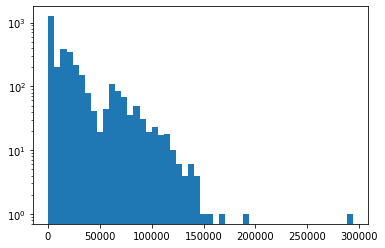

In [ ]:
plt.hist(initial_data['ups'], bins=50, log=True);
print(initial_data.shape)
# plt.xlim(180000, 500000)
# plt.ylim(0, 10)

In [ ]:
#@title Data Science Problems
%%html
<figure>
<center>
<img src='https://i.imgflip.com/39qq22.jpg' width=400 height=250/>
<figcaption></figcaption></center>
</figure>

Ce DataSet n'est pas suffisant pour creer un modele qui prevoit si un meme est bon ou pas 

In [ ]:
#@title Ne vous inquietez pas...
%%html
<figure>
<center>
<img src='https://miro.medium.com/max/550/0*Bj_O1jRFzZjKxzi4.jpg' width=400 height=300/>
<figcaption></figcaption></center>
</figure>

# Faire du Scrapping de commentaires depuis le subreddit "Dank Memes"

Grace au fichier db.json qui contient les metadata sur les memes de notre dataset, nous avons parcouru le subreddit r/dankmemes/ pour récupérer les commentaires. 
Nous avons utiliser:
* selenium : à l'origine, une bibliothèque de tests javascript, couramment utilisée pour le scrapping de sites web avec chargement de contenu dynamique 

* chrome-driver : navigateur chrome, mais headless (sans GUI)

Nous obtenons donc un nouveau dataset avec des commentaires

In [ ]:
raw = pd.read_csv('https://raw.githubusercontent.com/EMSIMa/DS/main/memes_data_full2.csv', header=0, index_col=0)

raw = raw.dropna()

In [ ]:
raw.head()

,author,media,downs,title,created_utc,width,thumbnail,height,ups,id,comment,usr,total_cmnts,percent_ups
0,itsopaz,https://i.redd.it/3blmjda9w4ny.jpg,0,1929 was rough year,1.490265e+09,140,https://b.thumbs.redditmedia.com/Lo2LOVGTJc-uv...,83,26034,6110zu,dank.,savageaxebot,509 comments,91% Upvoted
1,itsopaz,https://i.redd.it/3blmjda9w4ny.jpg,0,1929 was rough year,1.490265e+09,140,https://b.thumbs.redditmedia.com/Lo2LOVGTJc-uv...,83,26034,6110zu,farmer: well if the bank doesn't kick me off t...,pacificol,509 comments,91% Upvoted
2,itsopaz,https://i.redd.it/3blmjda9w4ny.jpg,0,1929 was rough year,1.490265e+09,140,https://b.thumbs.redditmedia.com/Lo2LOVGTJc-uv...,83,26034,6110zu,banker: we need a way to ensure that food can'...,evolving_dore,509 comments,91% Upvoted
3,itsopaz,https://i.redd.it/3blmjda9w4ny.jpg,0,1929 was rough year,1.490265e+09,140,https://b.thumbs.redditmedia.com/Lo2LOVGTJc-uv...,83,26034,6110zu,if the bank doesn't enforce a punishment for d...,2 years ago,509 comments,91% Upvoted
4,itsopaz,https://i.redd.it/3blmjda9w4ny.jpg,0,1929 was rough year,1.490265e+09,140,https://b.thumbs.redditmedia.com/Lo2LOVGTJc-uv...,83,26034,6110zu,many farmers went bankrupt because they were c...,drsandbags,509 comments,91% Upvoted


In [ ]:
#@title .
%%html
<figure>
<center>
<img src='https://i.imgflip.com/3ar5z2.jpg' width=400 height=400/>
<figcaption></figcaption></center>
</figure>

In [ ]:
memes = raw.groupby('id').apply(lambda x: pd.Series(\
  {'comments'       : ' '.join(x['comment']).lower().replace('dank', ' '),\
   'sampled_cmnts'  : len(x), \
   'sampled_cmnters': len(x['usr'].unique()),
   'dank'           : len(x[(x['usr']=='savageaxebot') & (x['comment'].apply(lambda x: 'dank' in x))])>0,
    'author'        : x['author'].iloc[0],
    'media'         : x['media'].iloc[0],
    'title'         : x['title'].iloc[0], 
    'ups'           : x['ups'].iloc[0],
    'total_cmnts'   : x['total_cmnts'].iloc[0].split()[0],
    'percent_ups'  :  int(x['percent_ups'].iloc[0].split()[0][:-1])})).reset_index()

memes['total_cmnts'] = memes['total_cmnts'].apply(lambda x: float(x[:-1])*1000 if x[-1]=='k' else float(x))

In [ ]:
memes.sample(5)

,id,comments,sampled_cmnts,sampled_cmnters,dank,author,media,title,ups,total_cmnts,percent_ups
536,7iimpi,. the video should just have been pewdiepie s...,16,16,True,sumojoe118,https://i.imgur.com/MdoCga2.jpg,#tanktherewind,14929,260.0,97
205,6l2am6,. many argue he was better than messi back in...,16,16,True,pseudocilin,https://i.redd.it/m7no3so0pf7z.jpg,show your support,24538,254.0,87
870,8bse8k,. the zucc is not awkward. his behavior is co...,17,17,True,casualdad8675309,https://i.redd.it/65bzzioisir01.jpg,got ‘em,75251,510.0,97
871,8bw58q,. lol this better not be real i thought the ...,15,15,True,sumojoe118,https://imgur.com/FuomzMp.jpg,top 10 anime betrayals,27241,586.0,92
659,7u8yfp,r/ memes mods run into every hurdle. r/ memes ...,56,51,False,glu_ert,https://i.redd.it/ikvk97wppdd01.jpg,missed me,14131,123.0,91


# Notre tache: Classifier les memes comme Dank ou pas

In [ ]:
#@title .
%%html
<figure>
<center>
<img src='https://motherboard-images.vice.com/content-images/contentimage/30813/1456153687249785.png' width=400 height=270/>
<figcaption></figcaption></center>
</figure>

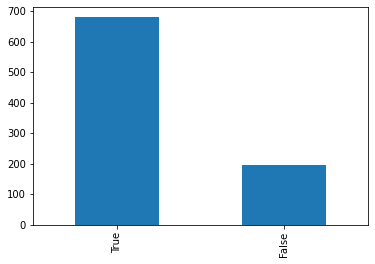

In [ ]:
memes['dank'].value_counts().plot(kind='bar');

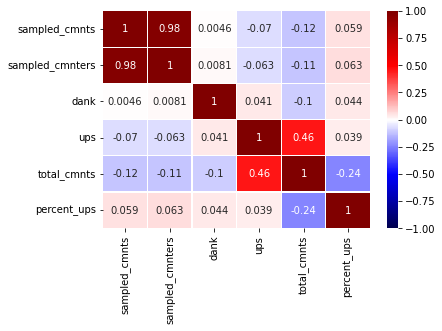

In [ ]:
import seaborn as sns
# sns.heatmap(memes[[x for x in memes.columns if x not in ['downs', 'width']]].corr(), vmin=-1, vmax=1, cmap='seismic', linewidths=0.2, annot=True);
sns.heatmap(memes.corr(), vmin=-1, vmax=1, cmap='seismic', linewidths=0.2, annot=True);

In [ ]:
import numpy as np
from matplotlib import pyplot as plt

Text(0, 0.5, 'Total Comments')

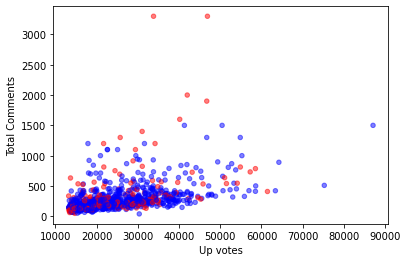

In [ ]:
colors_dict = {0:'red', 1:'blue'}
plt.scatter(memes['ups'], memes['total_cmnts'], color=[colors_dict[x] for x in memes['dank']], s=20, alpha=0.5);
plt.xlabel('Up votes')
plt.ylabel('Total Comments')

Text(0, 0.5, 'Total Comments')

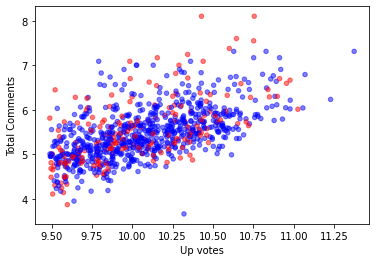

In [ ]:
plt.scatter(np.log(memes['ups']), np.log(memes['total_cmnts']), color=[colors_dict[x] for x in memes['dank']], s=20, alpha=0.5);
plt.xlabel('Up votes')
plt.ylabel('Total Comments')

In [ ]:
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import metrics

## Régression logistique en utilisant le nombre total de commentaires et de "upvotes".

In [ ]:
X, y = memes[['total_cmnts', 'ups']], memes['dank']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 1)

clf = LogisticRegression(solver='lbfgs')
clf.fit(X_train, y_train)

preds = clf.predict(X_test)

print(metrics.classification_report(y_test, preds))

              precision    recall  f1-score   support

       False       1.00      0.03      0.05        39
        True       0.78      1.00      0.88       137

    accuracy                           0.78       176
   macro avg       0.89      0.51      0.46       176
weighted avg       0.83      0.78      0.69       176



Nous avons un bon score, mais il faut faire attention à la distribution des données. Ici nous avons une majorité de dank memes.

## Régression logistique utilisant le texte des commentaires

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
CountVectorizer?

In [ ]:
memes.shape

(876, 11)

In [ ]:
vectorizer = CountVectorizer(stop_words='english', max_features=500)

X, y = vectorizer.fit_transform(memes['comments']), memes['dank']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)

clf = LogisticRegression(solver='lbfgs')
clf.fit(X_train, y_train)

preds = clf.predict(X_test)

print(metrics.classification_report(y_test, preds))

              precision    recall  f1-score   support

       False       0.43      0.39      0.41        85
        True       0.81      0.84      0.82       266

    accuracy                           0.73       351
   macro avg       0.62      0.61      0.62       351
weighted avg       0.72      0.73      0.72       351



In [ ]:
pd.DataFrame(X.todense())

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,1,1,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
871,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
872,0,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
873,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
874,0,0,0,0,0,1,0,0,1,1,...,0,0,0,0,0,1,0,0,0,0


In [ ]:
vectorizer.vocabulary_

{'got': 170,
 'post': 340,
 'thanks': 416,
 'upvotes': 447,
 'sub': 405,
 'doing': 105,
 'dumb': 112,
 'reddit': 356,
 'doesn': 103,
 'google': 169,
 'seen': 378,
 'meme': 277,
 'away': 30,
 'posts': 342,
 'die': 98,
 'like': 249,
 'did': 96,
 'really': 354,
 'ing': 218,
 'dead': 91,
 'killed': 233,
 'live': 255,
 'don': 106,
 'mods': 290,
 'karma': 229,
 'day': 89,
 'edit': 119,
 'wow': 488,
 'lol': 260,
 'wait': 459,
 'happened': 184,
 'coming': 71,
 'hitler': 199,
 'good': 168,
 'thought': 423,
 'make': 269,
 'big': 40,
 'world': 485,
 'white': 474,
 'clearly': 64,
 'look': 262,
 'image': 215,
 'come': 69,
 'isn': 223,
 'ya': 492,
 'later': 242,
 'link': 252,
 'place': 335,
 'just': 228,
 'people': 330,
 'jesus': 224,
 '000': 0,
 'million': 283,
 'time': 426,
 'actually': 13,
 'different': 100,
 'knew': 236,
 'memes': 278,
 'new': 304,
 'guy': 176,
 'turn': 440,
 'things': 419,
 'great': 173,
 'war': 464,
 'www': 491,
 'check': 61,
 'real': 353,
 'question': 349,
 'know': 237,
 'tex

In [ ]:
# chaque ligne de X corresponds a un commentaire et chaque colonne a un mot
X.shape, len(vectorizer.vocabulary_), memes.shape


((876, 500), 500, (876, 11))

# Prédire les Upvotes sur Reddit (Regression Lineaire)

In [ ]:
memes.corr()

,sampled_cmnts,sampled_cmnters,dank,ups,total_cmnts,percent_ups
sampled_cmnts,1.000000,0.982008,0.004567,-0.070226,-0.116431,0.058563
sampled_cmnters,0.982008,1.000000,0.008105,-0.062804,-0.114190,0.062943
dank,0.004567,0.008105,1.000000,0.040610,-0.100670,0.043521
ups,-0.070226,-0.062804,0.040610,1.000000,0.455916,0.038760
total_cmnts,-0.116431,-0.114190,-0.100670,0.455916,1.000000,-0.239881
percent_ups,0.058563,0.062943,0.043521,0.038760,-0.239881,1.000000


Mean Absolute Error:7119.476088038197
Mean Squared Error:94281028.90350807
Root Mean Squared Error:9709.84185780119


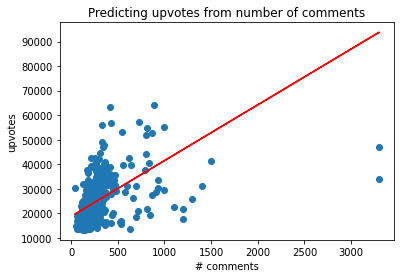

In [ ]:
X, y = memes[['total_cmnts']], memes['ups']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)

reg = LinearRegression().fit(X_train, y_train)
y_pred = reg.predict(X_test)

mae = metrics.mean_absolute_error(y_test, y_pred)
msq = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))

print('Mean Absolute Error:'+str(mae))
print('Mean Squared Error:'+str(msq))
print('Root Mean Squared Error:'+str(rmse))

plt.scatter(X_test, y_test);
plt.plot(X_test, y_pred, color='red');
plt.xlabel('# comments');
plt.ylabel('upvotes');
plt.title('Predicting upvotes from number of comments');

Mean Absolute Error:0.2459503679080782
Mean Squared Error:0.09038911885097267
Root Mean Squared Error:0.3006478319412476


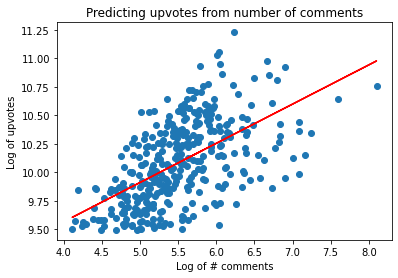

In [ ]:
X, y = np.log(memes[['total_cmnts']]), np.log(memes['ups'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)

reg = LinearRegression()
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)

mae = metrics.mean_absolute_error(y_test, y_pred)
msq = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))

print('Mean Absolute Error:'+str(mae))
print('Mean Squared Error:'+str(msq))
print('Root Mean Squared Error:'+str(rmse))

plt.scatter(X_test, y_test);
plt.plot(X_test, y_pred, color='red');
plt.xlabel('Log of # comments');
plt.ylabel('Log of upvotes');
plt.title('Predicting upvotes from number of comments');

In [ ]:
results = []

vectorizer = CountVectorizer(stop_words='english')
X, y = vectorizer.fit_transform(memes['comments']), np.log(memes['ups'])

for i in range(10):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=i*4)

  reg = LinearRegression().fit(X_train, y_train)
  y_pred = reg.predict(X_test)

  mae = metrics.mean_absolute_error(y_test, y_pred)
  msq = metrics.mean_squared_error(y_test, y_pred)
  rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))

  results.append(msq)

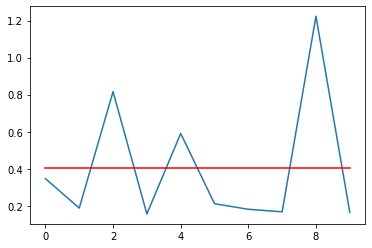

In [ ]:
plt.plot(results)
plt.plot([np.mean(results)]*len(results), color='red');

## Régression polynomiale

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from math import log

In [ ]:
StandardScaler?

In [ ]:
MinMaxScaler?

In [ ]:
filtered = pd.DataFrame(memes).sample(20)

scaler = StandardScaler()

filtered['total_cmnts'] = filtered['total_cmnts'].apply(lambda x: log(x+1))

power = 20
for i in range(2,power):
  filtered[f'total_cmnts_{i}'] = filtered['total_cmnts'].apply(lambda x: x**i)

cols = ['total_cmnts']+[f'total_cmnts_{i}' for i in range(2,power)]

In [ ]:
filtered[cols]

,total_cmnts,total_cmnts_2,total_cmnts_3,total_cmnts_4,total_cmnts_5,total_cmnts_6,total_cmnts_7,total_cmnts_8,total_cmnts_9,total_cmnts_10,total_cmnts_11,total_cmnts_12,total_cmnts_13,total_cmnts_14,total_cmnts_15,total_cmnts_16,total_cmnts_17,total_cmnts_18,total_cmnts_19
375,5.505332,30.308675,166.859306,918.615800,5057.284531,27842.028017,153279.594866,8.438550e+05,4.645701e+06,2.557613e+07,1.408051e+08,7.751785e+08,4.267615e+09,2.349463e+10,1.293458e+11,7.120912e+11,3.920298e+12,2.158254e+13,1.188191e+14
422,5.087596,25.883636,131.685494,669.962637,3408.499456,17341.069343,88224.360838,4.488499e+05,2.283567e+06,1.161787e+07,5.910703e+07,3.007127e+08,1.529905e+09,7.783538e+09,3.959950e+10,2.014663e+11,1.024979e+12,5.214680e+12,2.653018e+13
113,4.394449,19.311183,84.862013,372.921803,1638.785903,7201.561327,31646.895084,1.390707e+05,6.111390e+05,2.685619e+06,1.180182e+07,5.186249e+07,2.279071e+08,1.001526e+09,4.401155e+09,1.934065e+10,8.499151e+10,3.734909e+11,1.641287e+12
567,5.252273,27.586376,144.891190,761.008150,3997.022884,20993.457084,110263.376803,5.791334e+05,3.041767e+06,1.597619e+07,8.391133e+07,4.407252e+08,2.314809e+09,1.215801e+10,6.385720e+10,3.353955e+11,1.761589e+12,9.252346e+12,4.859585e+13
842,5.129899,26.315861,134.997701,692.524531,3552.580702,18224.379175,93489.219312,4.795902e+05,2.460249e+06,1.262083e+07,6.474358e+07,3.321280e+08,1.703783e+09,8.740234e+09,4.483652e+10,2.300068e+11,1.179912e+12,6.052827e+12,3.105039e+13
441,5.849325,34.214600,200.132310,1170.638879,6847.447005,40052.941444,234282.662901,1.370395e+06,8.015888e+06,4.688753e+07,2.742604e+08,1.604238e+09,9.383710e+09,5.488837e+10,3.210599e+11,1.877984e+12,1.098494e+13,6.425446e+13,3.758452e+14
373,6.694562,44.817161,300.031267,2008.577934,13446.549629,90018.760963,602636.181695,4.034385e+06,2.700844e+07,1.808097e+08,1.210442e+09,8.103377e+09,5.424856e+10,3.631704e+11,2.431267e+12,1.627626e+13,1.089625e+14,7.294560e+14,4.883388e+15
518,5.509388,30.353360,167.228447,921.326454,5075.945219,27965.353386,154071.991774,8.488424e+05,4.676603e+06,2.576522e+07,1.419506e+08,7.820610e+08,4.308678e+09,2.373818e+10,1.307828e+11,7.205335e+11,3.969699e+12,2.187061e+13,1.204937e+14
814,5.579730,31.133385,173.715876,969.287657,5408.363251,30177.205742,168380.654946,9.395186e+05,5.242260e+06,2.925039e+07,1.632093e+08,9.106637e+08,5.081258e+09,2.835204e+10,1.581968e+11,8.826951e+11,4.925200e+12,2.748129e+13,1.533382e+14
362,6.308098,39.792106,251.012522,1583.411696,9988.316850,63007.285957,397456.162346,2.507193e+06,1.581562e+07,9.976647e+07,6.293367e+08,3.969918e+09,2.504263e+10,1.579714e+11,9.964991e+11,6.286015e+12,3.965280e+13,2.501338e+14,1.577868e+15


[Linear] Root Mean Squared Error: 7706.393002585847
[Polynomial] Root Mean Squared Error:4162.3639137228065


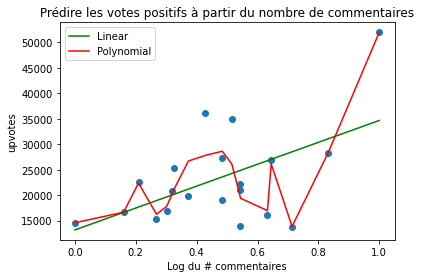

In [ ]:
filtered[cols] = scaler.fit_transform(filtered[cols])

filtered.sort_values('total_cmnts', inplace=True)

X_train, y_train = filtered[cols], filtered['ups']

reg_simple = LinearRegression().fit(X_train[['total_cmnts']], y_train)
y_pred_simple = reg_simple.predict(X_train[['total_cmnts']])
rmse_simple = np.sqrt(metrics.mean_squared_error(y_train, y_pred_simple))

reg = LinearRegression().fit(X_train, y_train)
y_pred = reg.predict(X_train)
rmse = np.sqrt(metrics.mean_squared_error(y_train, y_pred))

print("[Linear] Root Mean Squared Error: %s" % rmse_simple)
print('[Polynomial] Root Mean Squared Error:%s' % rmse)

plt.scatter(X_train['total_cmnts'], y_train);

plt.plot(X_train['total_cmnts'], y_pred_simple, color='green', alpha=1);
plt.plot(X_train['total_cmnts'], y_pred, color='red', alpha=1);

plt.legend(['Linear', 'Polynomial'])

plt.xlabel('Log du # commentaires');
plt.ylabel('upvotes');
plt.title('Prédire les votes positifs à partir du nombre de commentaires');

y = ax + bx^2 + cx^3 + ... + z

# Clustering

In [ ]:
memes.sample(5)

,id,comments,sampled_cmnts,sampled_cmnters,dank,author,media,title,ups,total_cmnts,percent_ups
216,6lr29e,. we let the meme war blind us from the true ...,14,14,True,the_dankmiester,https://i.redd.it/dlmcv0jib38z.png,"i know the second great meme war is going on, ...",29197,564.0,87
865,8bfhyy,. did you enlarge his eyes more? cause if not...,16,15,True,ishouldquitmycult,https://i.redd.it/w19jo3ckp8r01.jpg,very yummy,30428,297.0,94
587,7n9j3b,". if this was realistic, i would try to go st...",16,16,True,laughing_fish,https://i.imgur.com/ZJS7VNw.png,"new year, new memes",19036,120.0,96
597,7o154m,. his up caused him to be featured on nation...,16,16,True,cheezb,https://i.redd.it/mh63pgkyuz701.jpg,he learned from the best,36871,376.0,91
874,8c5slz,". reddit godd, bring this man some upvotes! a...",40,39,True,redead,https://i.redd.it/gu3r6jg0htr01.png,are the servers down?,19207,121.0,95


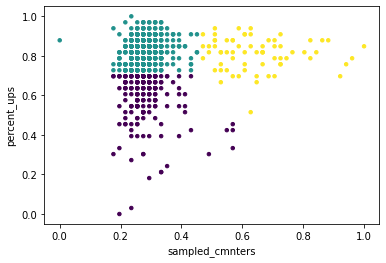

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler, normalize

from itertools import combinations

a, b = 'sampled_cmnters', 'percent_ups'

plt.figure()

scaler = MinMaxScaler()
X = scaler.fit_transform(memes[[a, b]])

kmeans = KMeans(n_clusters=3)
clusters = kmeans.fit_predict(X)

plt.scatter(X[:,0], X[:,1], c=clusters, s=12);
plt.xlabel(a);
plt.ylabel(b);

In [ ]:
#@title A vous de jouer!
%%html
<figure>
<center>
<img src='https://i.imgflip.com/3as5g1.jpg' width=400 height=270/>
<figcaption></figcaption></center>
</figure>